In [95]:
A=[[0.2,0.2],[0.6,0.6],[0.7,0.7],[0.4,0.7],[0.7,0.4]]
theta=0.4
V=[]
W=[]
C=[]
col=0
delta=1


# Expantion:-

In [96]:
def expand(p,m):
    if(len(V)!=0):
        for i in range(0,len(V)):
            if(V[i][0]<=p[0] and V[i][1]<=p[1]):
                if(W[i][0]>=p[0] and W[i][1]>=p[1]):
                    print("Given point lies inside the hyperBox")
                    return 0
    return exp_criteria(p,m) 

# Exapantion Criteria:-

In [97]:
def exp_criteria(p,m):
    for j in range(0,len(V)):
        temp=0
        for i in range(0,2):
            temp=temp+(max(W[j][i],p[i])-min(V[j][i],p[i]))
            #print("This is a message : ",(max(W[j][i],p[i]),min(V[j][i],p[i])))
        if(2*theta>=temp):
            print("Exp.crit. satisfied")
            #print("Old min-max are-",V,"to",W)
            x=[]
            y=[]
            for k in range(0,2):
                x.append(min(V[j][k],p[k]))
                y.append(max(W[j][k],p[k]))
            if(x):
                V[j]=x
            if(y):
                W[j]=y
            print("New min-max are-",V,"to",W)
            return overlap_test()
        print("Exp.crit. is not satisfied")
    V.append(p)
    W.append(p)
    C.append(len(V)-1)
    print("This is the new h.Box",V,"&",W)
    return 0
        

# Overlap Test:-

In [98]:
def overlap_test():
    t=[]
    for k in range(0,len(V)):
        for j in range(0,len(V)):
            if(k==j):
                continue
            for i in range(0,2):
                temp=delta=1
                if(V[j][i]<V[k][i]<W[j][i]<W[k][i]):
                    delta=min(delta,(W[j][i]-V[k][i]))
                    q=1
                if(V[k][i]<V[j][i]<W[k][i]<W[j][i]):
                    delta=min(delta,(W[k][i]-V[j][i]))
                    q=2
                if(V[j][i]<V[k][i]<W[k][i]<W[j][i]):
                    delta=min(delta,min((W[j][i]-V[k][i]),(W[k][i]-V[j][i])))
                    q=3
                if(V[k][i]<V[j][i]<W[j][i]<W[k][i]):
                    delta=min(delta,min((W[j][i]-V[k][i]),(W[k][i]-V[j][i])))
                    q=3
                if(delta!=temp):
                    t.append(i)
            if(len(t)==2):
                for i in range(0,len(t)):
                    print("overapping hyperboxes :",k,"&",j,"in dimenstion ",i)
                    s=contract(q,t[i],k,j)
                return s
            return 0

# Contraction:-

In [99]:
def contract(c,i,k,j): 
    if(c==1):
        V[k][i]=W[j][i]=(V[k][i]+W[j][i])/2
    if(c==2):
        V[j][i]=W[k][i]=(V[j][i]+W[k][i])/2
    if(c==3):
        if((W[j][i]-V[k][i])<(W[k][i]-V[j][i])):
            W[j][i]=V[k][i]
        else:
            V[j][i]=W[k][i] 
    if(c==4):
        if((W[k][i]-V[j][i])<(W[j][i]-V[k][i])):
            W[k][i]=V[j][i]
        else:
            V[k][i]=W[j][i]
    print("--------after contraction---------")
    print("New min-max are-",V,"to",W)
    return 1;    
            

# Main method:-

In [100]:
for j in range(0,len(A)):
    p=expand(A[j],i)
    print("=============================================")

This is the new h.Box [[0.2, 0.2]] & [[0.2, 0.2]]
Exp.crit. satisfied
New min-max are- [[0.2, 0.2]] to [[0.6, 0.6]]
Exp.crit. is not satisfied
This is the new h.Box [[0.2, 0.2], [0.7, 0.7]] & [[0.6, 0.6], [0.7, 0.7]]
Exp.crit. is not satisfied
Exp.crit. satisfied
New min-max are- [[0.2, 0.2], [0.4, 0.7]] to [[0.6, 0.6], [0.7, 0.7]]
Exp.crit. is not satisfied
Exp.crit. satisfied
New min-max are- [[0.2, 0.2], [0.4, 0.4]] to [[0.6, 0.6], [0.7, 0.7]]
overapping hyperboxes : 0 & 1 in dimenstion  0
--------after contraction---------
New min-max are- [[0.2, 0.2], [0.5, 0.4]] to [[0.5, 0.6], [0.7, 0.7]]
overapping hyperboxes : 0 & 1 in dimenstion  1
--------after contraction---------
New min-max are- [[0.2, 0.2], [0.5, 0.5]] to [[0.5, 0.5], [0.7, 0.7]]


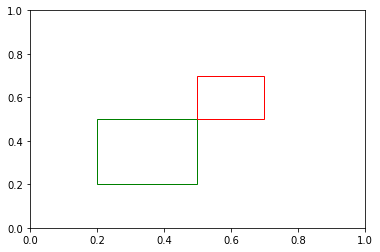

In [101]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
c=['r','g']
plt.xlim(0,1)
plt.ylim(0,1)
currentAxis = plt.gca()
for i in range(len(V)):
    if(V[i]==W[i]):
        plt.scatter(V[i][0],V[i][1],color=c[int(C[i])-1])
    else:
        currentAxis.add_patch(Rectangle((V[i][0], V[i][1]), W[i][0]-V[i][0],W[i][1]-V[i][1],alpha=1,fill=None,edgecolor=c[int(C[i])-1]))                
plt.show()